# Wavernn

### Neural Synthesizer has been proven to be way powerful than statistical synthesize, but there has been core issue of performance, this implementaion is based on a paper which helps in reducing that performance requirement

In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
import math
from tqdm import tqdm

#### Hyper params have been defined in the central location for easy access

In [13]:
length_of_wave = 1000
sample_rate = 160
batch_size = 1
max_sequence_length = 100
number_input_in_each_instant= 1
number_of_the_rnn_cells= 32
number_of_layers_in_rnns= 2
new_sequences = 100

#### This block is used to generate the input samples

In [4]:
function = np.sin(np.arange(length_of_wave) * 2 * np.pi /sample_rate).astype(np.float32)

X=list()
y=list()

for e in range(1,length_of_wave):
    X.append(function[e-1])
    y.append(function[e])

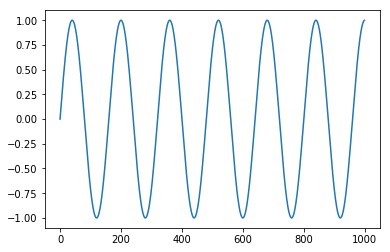

In [5]:
plt.plot(function)

### Architecture of the Wavernn

In [7]:
tf_input_X=tf.placeholder(tf.float32,[batch_size,max_sequence_length,number_input_in_each_instant])
tf_input_y=tf.placeholder(tf.float32,[batch_size,1])

gru_cells=[tf.contrib.rnn.GRUCell(number_of_the_rnn_cells) for x in range(number_of_layers_in_rnns)]

gru_cells.append(tf.contrib.rnn.GRUCell(1))

densed_gru_cells=tf.contrib.rnn.MultiRNNCell(gru_cells)

raw_time_outputs=tf.nn.dynamic_rnn(densed_gru_cells,tf_input_X,dtype=tf.float32)[0]

output=tf.transpose(raw_time_outputs,[1,0,2])[-1]

cost=tf.losses.mean_squared_error(labels=tf_input_y,predictions=output)

optimizer=tf.train.AdamOptimizer().minimize(cost)

In [8]:
# defining interactive session for ease of usage
tf.InteractiveSession()

In [9]:
# Initializing global variables
tf.global_variables_initializer().run()

## Training Block

100%|██████████| 150/150 [00:16<00:00,  8.91it/s]


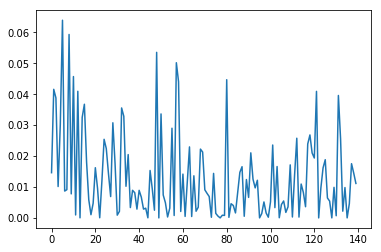

In [12]:
cost_output=[]

number_of_steps=150
for e in tqdm(range(number_of_steps)):

    starting_index=np.random.randint(length_of_wave-max_sequence_length-2)
    
    X_sequence=np.asarray(X[starting_index:starting_index+max_sequence_length]).reshape(1,100,1)
    y_sequence=np.asarray(y[starting_index+max_sequence_length-1]).reshape(1,1)
    
    optimizer.run(feed_dict={tf_input_X:X_sequence,tf_input_y:y_sequence})

    if e %(number_of_steps/10):
        cost_in_turn=cost.eval(feed_dict={tf_input_X:X_sequence,tf_input_y:y_sequence})
        cost_output.append(cost_in_turn)

# plotting the cost
plt.plot(cost_output)
plt.show()

## Generation Block

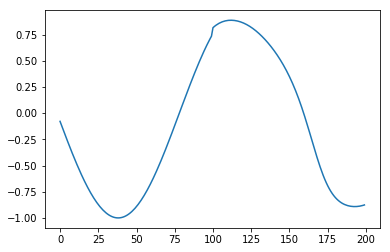

In [14]:
# Random index for better prediction
starting_index=np.random.randint(length_of_wave-max_sequence_length-2)

# data initializtion
X_sequence=X[starting_index:starting_index+max_sequence_length]


for printer in range(new_sequences):
    
    out=output.eval(feed_dict={tf_input_X:np.asarray(X_sequence[printer:]).reshape(1,100,1)})
    
    X_sequence.append(out)
    
plt.plot(X_sequence)
plt.show()